In [2]:
import pandas as pd
from collections import Counter
import numpy as np
from functools import reduce
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_profiling as pf
from functools import reduce
from scipy import stats
import math
import pandas_profiling as pf
from statsmodels.stats.weightstats import ztest
import scipy
from scipy.linalg import norm
from numpy import inf
import math
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
import pandas_profiling

from pandas.tools.plotting import scatter_matrix

from matplotlib import cm
from sklearn.svm import SVC
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('train.csv')
data=df.copy()

In [4]:
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,52310,NaN,NaN,NaN,6005.75,2306.45,2000,4015,6002,8004,10000
Agency,52310,16,EPX,26218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency Type,52310,2,Travel Agency,34996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distribution Channel,52310,2,Online,51419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Name,52310,25,Cancellation Plan,13254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,52310,NaN,NaN,NaN,58.2561,109.139,-2,10,24,57,4881
Destination,52310,97,SINGAPORE,14242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net Sales,52310,NaN,NaN,NaN,48.5547,60.1986,-389,19.8,29.5,55,682
Commision (in value),52310,NaN,NaN,NaN,12.22,22.8476,0,0,0,13.38,262.76
Age,52310,NaN,NaN,NaN,39.5557,13.7625,0,33,36,43,118


In [6]:
data.shape

(52310, 11)

In [7]:
data.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B096E2A400>,
      dtype=object)

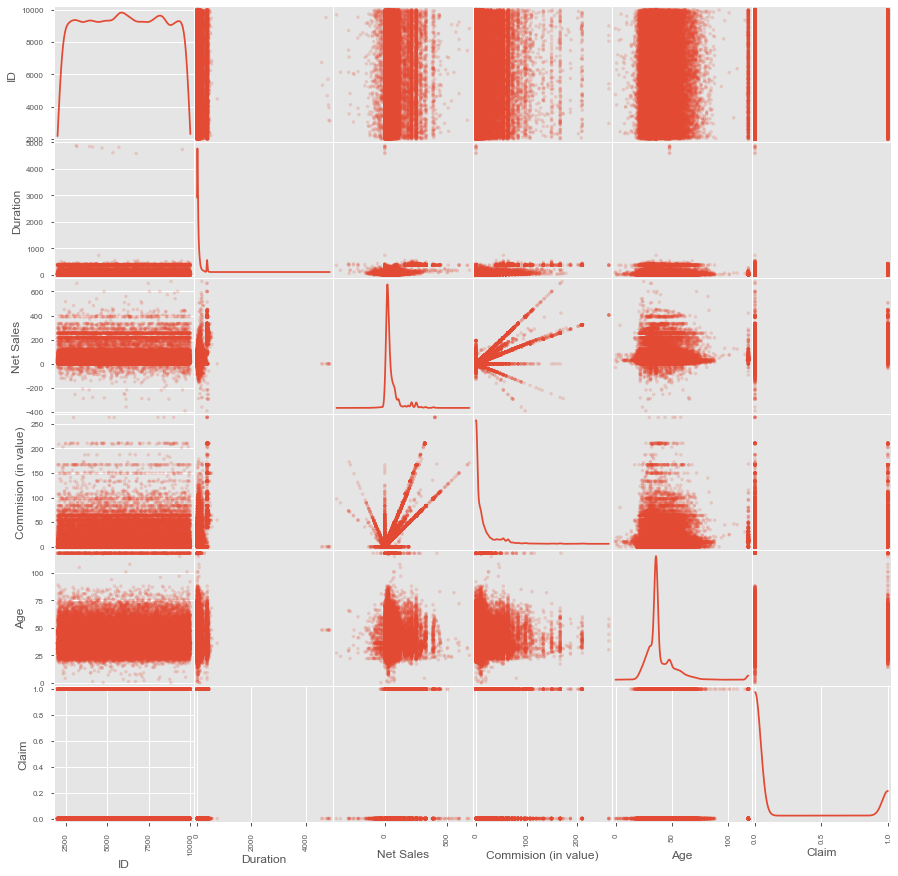

In [8]:
pd.scatter_matrix(data,figsize=(15,15),alpha=0.2,diagonal='kde')# Checking the trend in data.

Text(0.5, 0.98, 'Distribution of each Numerical column')

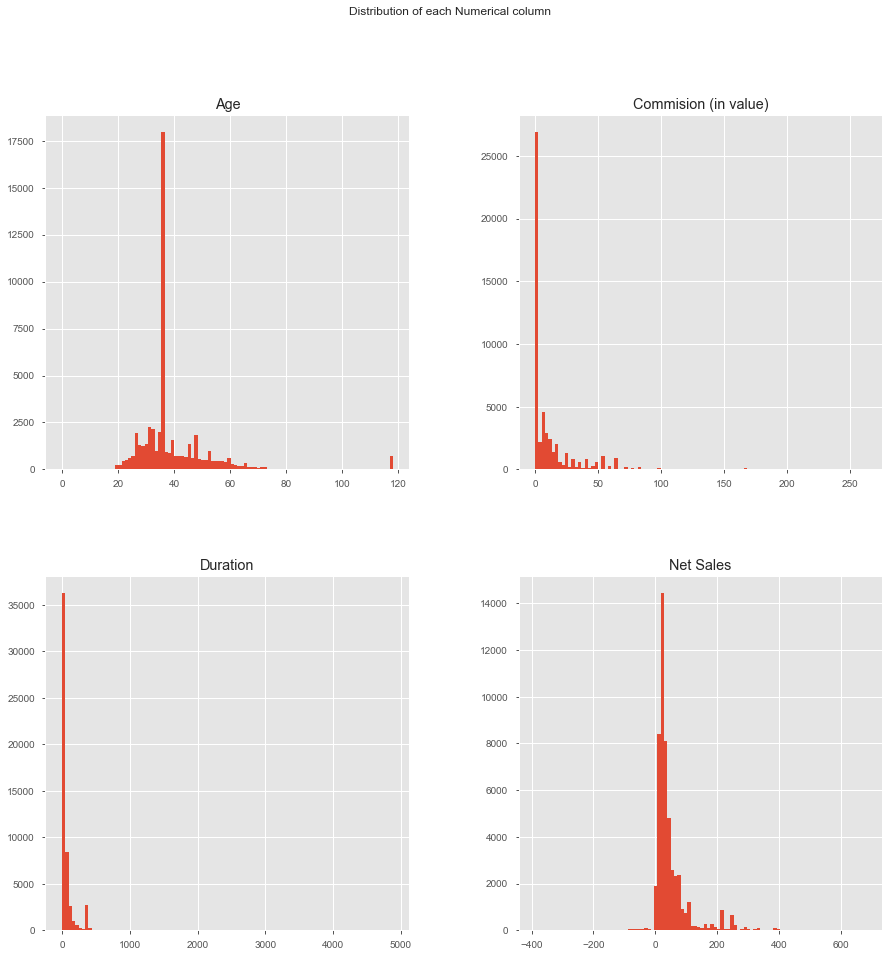

In [9]:
df.drop(['Claim','ID'],axis=1).hist(bins=100,figsize=(15,15))
plt.suptitle("Distribution of each Numerical column")

In [10]:
box_plot=data.drop(['ID','Claim'],axis=1)

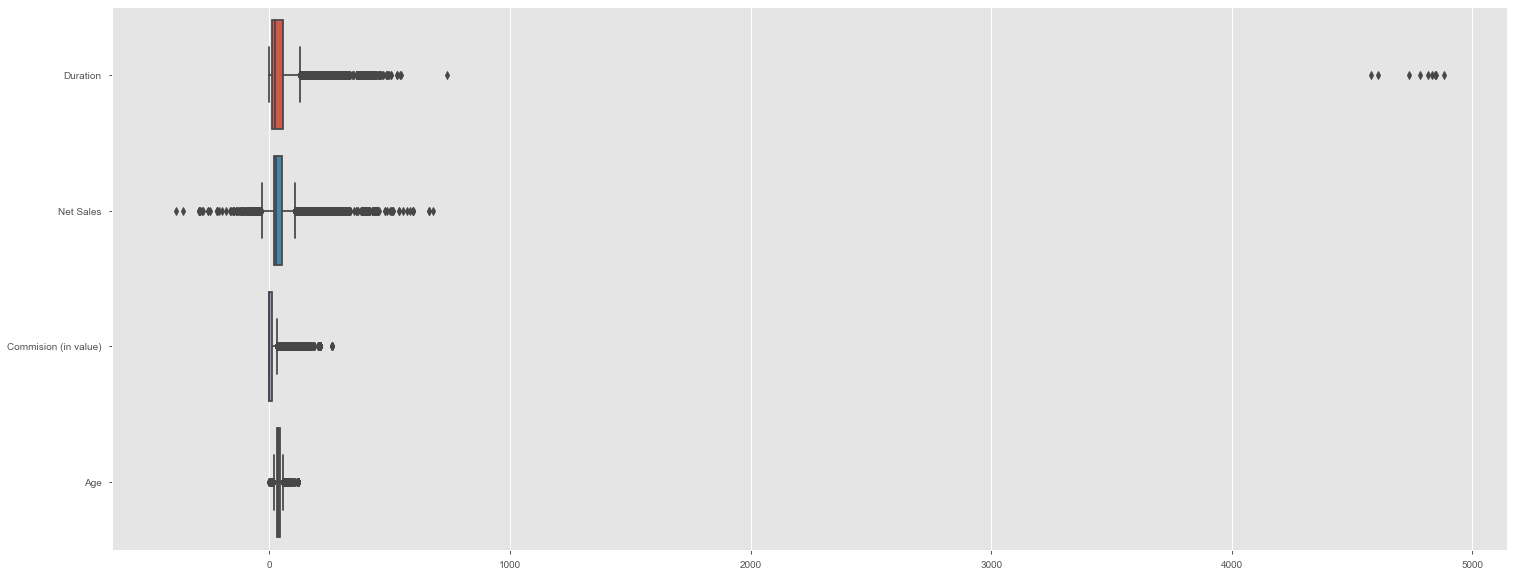

In [84]:
plt.figure(figsize=(25,10))
sns.boxplot(data=box_plot,orient='h')


In [39]:
mask1=data['Duration']<450
mask2=data['Duration']>0
mask3=data['Net Sales']>0
mask4=data['Age']<75
mask5=data['Net Sales']<450
mask6=data['Commision (in value)']<200

In [40]:
dat=data[mask1 & mask2 & mask3 & mask4 & mask5 & mask6]

In [41]:
len(dat)

49353

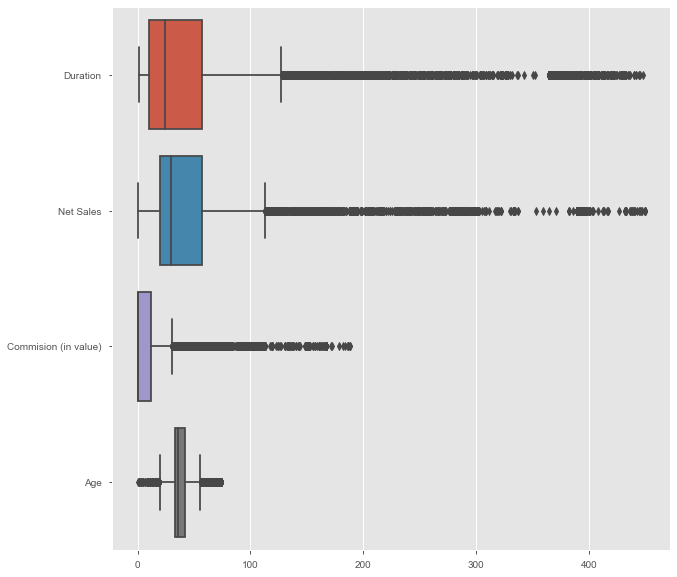

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(data=dat.drop(['ID','Claim'],axis=1),orient='h')

In [43]:
dat.columns = dat.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dat.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_in_value,age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [44]:
dat.drop(['id'],axis=1,inplace=True)

In [45]:
dat.drop(['distribution_channel','commision_in_value'],axis=1,inplace=True)



In [46]:
dat.head()

,agency,agency_type,product_name,duration,destination,net_sales,age,claim
0,EPX,Travel Agency,Cancellation Plan,61,PHILIPPINES,12.0,41,0
1,EPX,Travel Agency,Cancellation Plan,4,MALAYSIA,17.0,35,0
2,CWT,Travel Agency,Rental Vehicle Excess Insurance,26,THAILAND,19.8,47,0
3,EPX,Travel Agency,2 way Comprehensive Plan,15,HONG KONG,27.0,48,0
4,EPX,Travel Agency,2 way Comprehensive Plan,15,MALAYSIA,37.0,36,0


In [47]:
for col in dat.columns:
    print(col,":",len(dat[col].unique()))

agency : 15
agency_type : 2
product_name : 25
duration : 405
destination : 97
net_sales : 6411
age : 74
claim : 2


In [48]:
le=LabelEncoder()

In [49]:
dat=dat.apply(le.fit_transform)

In [50]:
dat.head()

,agency,agency_type,product_name,duration,destination,net_sales,age,claim
0,7,1,10,60,68,330,40,0
1,7,1,10,3,53,598,34,0
2,6,1,16,25,84,869,46,0
3,7,1,1,14,33,1762,47,0
4,7,1,1,14,53,2733,35,0


In [51]:
X=dat.iloc[:,:-1]
y=dat.iloc[:,-1]



In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0,stratify=y)



In [53]:
log=LogisticRegression(random_state=0)

In [54]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred=log.predict(X_test)

In [56]:
precision=precision_score(y_test,y_pred)

In [57]:
precision

0.591776798825257

In [58]:
rf=RandomForestClassifier(n_estimators=100,n_jobs=100,min_samples_leaf=100,random_state=0)

In [59]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=100, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
rf_y_pred=rf.predict(X_test)

precision_rf=precision_score(y_test,rf_y_pred)
precision_rf

0.6103559870550161

In [61]:
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [62]:
#clf=RandomForestClassifier(random_state=0)
#grid_search=GridSearchCV(estimator=clf,param_grid=parameter_grid,scoring='precision')
#grid_search.fit(X,y)



In [63]:
grid_y_pred = m_best.predict(X_test)
precision_score(y_test, grid_y_pred)

NameError: name 'm_best' is not defined

In [ ]:
#grid_search.best_estimator_

In [ ]:
#m_best

In [ ]:
#grid_search.best_params_

In [64]:
best_parameter_ransom_forest={'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [65]:
RFT_best_para=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features=1,min_samples_leaf=1,min_samples_split=10)

In [66]:
RFT_best_para.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
RFT_y_pred=RFT_best_para.predict(X_test)

In [68]:
precision_score(y_test, RFT_y_pred)

0.817870884993587

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0A0819710>,
      dtype=object)

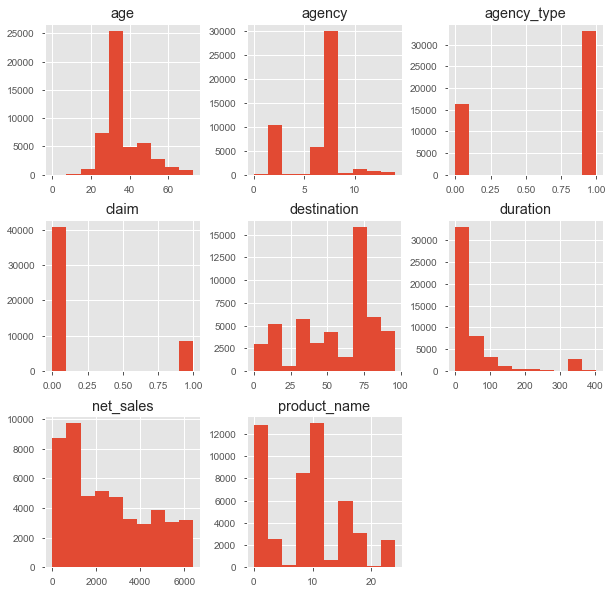

In [72]:
dat.hist(figsize=(10,10))

In [73]:
SVM_model=SVC(kernel='sigmoid',C=1,gamma='auto',random_state=0)
SVM_model.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [74]:
SVM_y_pred=SVM_model.predict(X_test)
precision_score(y_test, SVM_y_pred)

0.0

In [75]:
dat.head()

,agency,agency_type,product_name,duration,destination,net_sales,age,claim
0,7,1,10,60,68,330,40,0
1,7,1,10,3,53,598,34,0
2,6,1,16,25,84,869,46,0
3,7,1,1,14,33,1762,47,0
4,7,1,1,14,53,2733,35,0


In [76]:
data.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim                     int64
dtype: object

In [77]:
dat.head()

,agency,agency_type,product_name,duration,destination,net_sales,age,claim
0,7,1,10,60,68,330,40,0
1,7,1,10,3,53,598,34,0
2,6,1,16,25,84,869,46,0
3,7,1,1,14,33,1762,47,0
4,7,1,1,14,53,2733,35,0


In [78]:
mms=MinMaxScaler()

In [79]:
da=dat.copy()

In [80]:
da[['duration','net_sales','age']]=mms.fit_transform(da[['duration','net_sales','age']].astype('float32'))
X_da=da.iloc[:,:-1]
y_da=da.iloc[:,-1]
X_tra,X_tes,y_tra,y_tes=train_test_split(X_da,y_da,stratify=y,random_state=0)

In [81]:
da.head()

,agency,agency_type,product_name,duration,destination,net_sales,age,claim
0,7,1,10,0.148515,68,0.051482,0.547945,0
1,7,1,10,0.007426,53,0.093292,0.465753,0
2,6,1,16,0.061881,84,0.135569,0.630137,0
3,7,1,1,0.034653,33,0.274883,0.643836,0
4,7,1,1,0.034653,53,0.426365,0.479452,0


In [82]:
RFT_mms=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features=1,min_samples_leaf=1,min_samples_split=10)
RFT_mms.fit(X_tra,y_tra)
RFT_mms_y_pred_1=RFT_mms.predict(X_tes)
precision_score(y_tes, RFT_mms_y_pred_1)

0.8162243365047571

In [83]:
getcwd()

NameError: name 'getcwd' is not defined

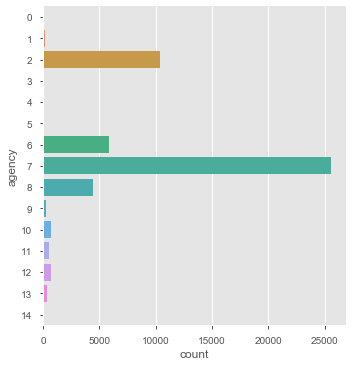

In [88]:
sns.catplot(y='agency',data=dat,kind='count')